# Multi-Layer Perceptron (MLP) - Model Invariance & Effect of Data Augmentation

In this notebook, we use the popular MNIST dataset, which is a collection of 70,000 handwritten digits. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. The goal is to identify the numbers using Pattern Recognition techniques.

This notebook is created to test an important performance issue of a Multi-Layer Perceptron (MLP). It is important to consider whether an MLP's predictions remain unchanged, or invariant, under one or more transformations of the input data. 

ie. We will implement a solution that ensures the invariance of the MLP model. For this, we will use a dataset that has three types of invariance present, namely- Translation(Shift image along x/y axis), Rotation and Noise(Add Gaussian noise to image).

The training data is not-augmented. For evaulating the performance, we use test subsets with both augmented and non-augmented data.

In [1]:
import warnings
import time
import numpy as np
import pandas as pd
import copy 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

from scipy.ndimage.interpolation import shift, rotate
from scipy.ndimage import gaussian_filter


from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Non-Augmented Data Matrix (X) and the Label Vector (y)

We load the data from file or from cloud and then put it into data matrix X and label vector y.

In [2]:
# Load the data from the local folder "data"
mnist = loadmat('data/mnist-original.mat')

#Create the data Matrix X and the target vector y
X = mnist["data"].T.astype('float64')
y = mnist["label"][0].astype('int64')

# Load data using Scikit-Learn
# mnist = fetch_openml('mnist_784', cache=False)

# X = mnist["data"].astype('float64')
# y = mnist["target"].astype('int64')


print("\nNo. of Samples: ", X.shape)
print("No. of Labels: ", y.shape)

print("\nX type: ", X.dtype)
print("y type: ", y.dtype)


No. of Samples:  (70000, 784)
No. of Labels:  (70000,)

X type:  float64
y type:  int64


## Split Data Into Training and Test Sets

We use sklearn's train_test_split function to spilt the dataset into training (80%) and test (20%) subsets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (56000, 784)
X_test:  (14000, 784)


## Data Augmentation

We define the three functions for augmenting the data in the following ways:
- Shifting the image along x-y coordinates (to add translation invariance)
- Rotating the image (to add rotation invariance)
- Blurring the image by adding Gaussian noise (to add noise invariance)

In [6]:
def shift_image(image, dx, dy):
    '''Shift an image by some value dx,dy'''
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


def rotate_image(image, angle):
    '''Rotate an image by some angle'''
    image = image.reshape((28, 28))
    rotated_image = rotate(image, angle, cval=0, mode="constant", reshape=False)
    return rotated_image.reshape([-1])


def add_gaussian_noise_image(image, sigma):
    '''Add Gaussian noise to an image'''
    image = image.reshape((28, 28))
    gaussian_image = gaussian_filter(image, sigma, cval=0, mode="constant") 
    return gaussian_image.reshape([-1])

## Demo: How to Augment Data by Shifting

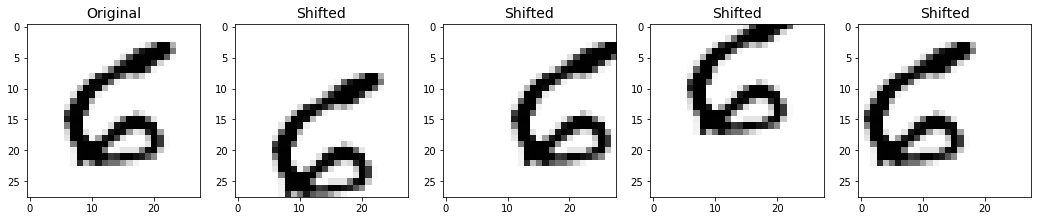

In [7]:
image = X_train[1000]
shifted_image_1 = shift_image(image, 0, 5)
shifted_image_2 = shift_image(image, 5, 0)
shifted_image_3 = shift_image(image, 0, -5)
shifted_image_4 = shift_image(image, -5, 0)


plt.figure(figsize=(18,6))
plt.subplot(151)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_4.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.show()

# Demo: How to Augment Data by Rotation

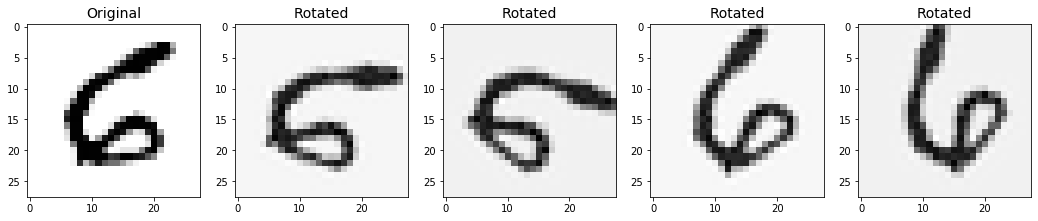

In [8]:
image = X_train[1000]
rotated_image_1 = rotate_image(image, -25)
rotated_image_2 = rotate_image(image, -45)
rotated_image_3 = rotate_image(image, 25)
rotated_image_4 = rotate_image(image, 45)


plt.figure(figsize=(18,6))
plt.subplot(151)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_4.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

## Demo: How to Augment Data by Blurring

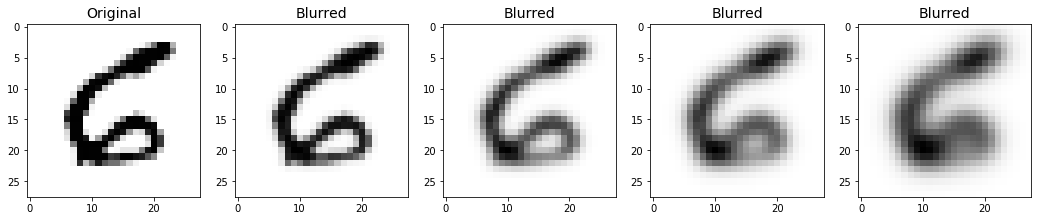

In [9]:
image = X_train[1000]
gaussian_image_1 = add_gaussian_noise_image(image, 0.5)
gaussian_image_2 = add_gaussian_noise_image(image, 1.0)
gaussian_image_3 = add_gaussian_noise_image(image, 1.5)
gaussian_image_4 = add_gaussian_noise_image(image, 2.0)


plt.figure(figsize=(18,6))
plt.subplot(151)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.title("Blurred", fontsize=14)
plt.imshow(gaussian_image_1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.title("Blurred", fontsize=14)
plt.imshow(gaussian_image_2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.title("Blurred", fontsize=14)
plt.imshow(gaussian_image_3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.title("Blurred", fontsize=14)
plt.imshow(gaussian_image_4.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

## Load Augmented Test Data 

Load the following augmented test data file: Test_Data

In [12]:
augmented_test_data = loadmat('data/mnist-test.mat')

X_test_augmented = augmented_test_data["X_test"].astype('float64')
y_test_augmented = augmented_test_data["y_test"][0].astype('int64')

## Scale the Data

In [13]:
# Create a deep copy of the training data for using it later for augmentation
X_train_original = copy.deepcopy(X_train)

X_train /= 255.0
X_test /= 255.0
X_test_augmented /= 255.0

## Train MLP Model using Non-Augmened Training Data

In [14]:
%%time
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=200, alpha=0.01,
                    solver='adam', verbose=True, tol=1e-5, random_state=1, 
                    learning_rate='constant', learning_rate_init=0.001, activation='relu',
                    early_stopping=True, n_iter_no_change=10)


# Train the model using the non-augmented training data
mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 0.40886675
Validation score: 0.932679
Iteration 2, loss = 0.19419106
Validation score: 0.951429
Iteration 3, loss = 0.14385625
Validation score: 0.960000
Iteration 4, loss = 0.11466252
Validation score: 0.964464
Iteration 5, loss = 0.09499003
Validation score: 0.965714
Iteration 6, loss = 0.08248333
Validation score: 0.970357
Iteration 7, loss = 0.07131126
Validation score: 0.970179
Iteration 8, loss = 0.06324839
Validation score: 0.972500
Iteration 9, loss = 0.05644300
Validation score: 0.973929
Iteration 10, loss = 0.05160096
Validation score: 0.973571
Iteration 11, loss = 0.04799070
Validation score: 0.975179
Iteration 12, loss = 0.04425474
Validation score: 0.976786
Iteration 13, loss = 0.04104076
Validation score: 0.975893
Iteration 14, loss = 0.03763602
Validation score: 0.976786
Iteration 15, loss = 0.03603052
Validation score: 0.977321
Iteration 16, loss = 0.03457569
Validation score: 0.976786
Iteration 17, loss = 0.03249957
Validation score: 0.977143
Iterat

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)

## Evaluate the Model using Test Data (Non-Augmented & Augmented)

Show the training accuracy, test (non-augmented) accuracy and test (augmented) accuracy. 

In [15]:
y_train_predicted = mlp_clf.predict(X_train)
accuracy_score_train_mlp = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy (non-augmented): ", accuracy_score_train_mlp)


y_test_predicted = mlp_clf.predict(X_test)
accuracy_score_test_mlp = np.mean(y_test_predicted == y_test)
print("\nNon-Augmented Test Accuracy (based on non-augmented model): ", accuracy_score_test_mlp)



y_test_aug_predicted = mlp_clf.predict(X_test_augmented)
accuracy_score_test_aug_mlp = np.mean(y_test_aug_predicted == y_test_augmented)
print("\nAugmented Test Accuracy (based on non-augmented model):  ", accuracy_score_test_aug_mlp)


Training Accuracy (non-augmented):  0.9981428571428571

Non-Augmented Test Accuracy (based on non-augmented model):  0.9808571428571429

Augmented Test Accuracy (based on non-augmented model):   0.4307142857142857


## Observation
The augmented test accuracy is low because the data that we have used to train our model is not augemented. Meanwhile, the augmented test data contains images that are altered by translation of the original images. The MLP model is not invariant to the translation of the images that are used to train it.

## Detemine the Type of Data Augmentation


We need to analyze the augmented test data (X_test_augmented) to determine what type of augmentation is required for the training data. You may want to visualize a sequence of images (from X_test_augmented) to understand the type of required data augmentation. Please show your work.

For example, if you observe that images are blurred (in X_test_augmented), then augment the training data by adding Gaussian noises.    

Depending on the augmentation technique, we need to determine the following parameter values for the augmentation function as well:
- Shifting: dx & dy
- Rotation: angle
- Blurring: sigma

We use at least four values for each parameter to augment the data.

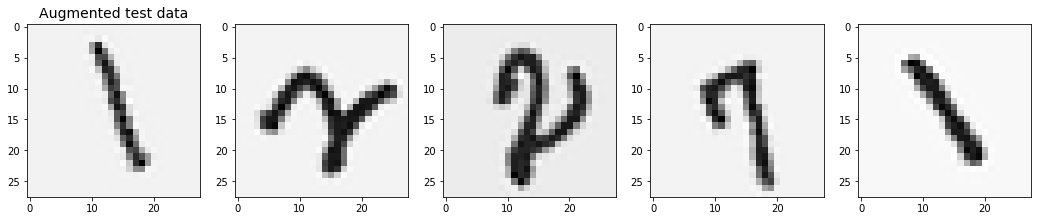

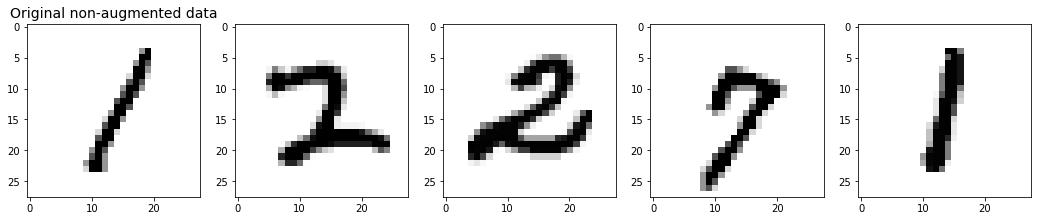

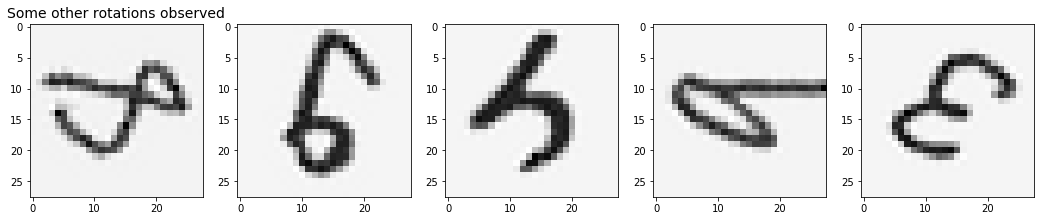

In [16]:
'''Analysis of the augmented test data (X_test_augmented) 
 to determine what type of augmentation required for the training data
'''
image1 = X_test_augmented[14000]
image2 = X_test_augmented[14002]
image3 = X_test_augmented[14003]
image4 = X_test_augmented[14004]
image5 = X_test_augmented[14005]

plt.figure(figsize=(18,6))

plt.subplot(151)
plt.title("Augmented test data", fontsize=14)
plt.imshow(image1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.imshow(image2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.imshow(image3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.imshow(image4.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.imshow(image5.reshape(28, 28), interpolation="nearest", cmap="Greys")

'''Analysis of the non-augmented test data (X_test)'''
image1 = X_test[0]
image2 = X_test[2]
image3 = X_test[3]
image4 = X_test[4]
image5 = X_test[5]

plt.figure(figsize=(18,6))

plt.subplot(151)
plt.title("Original non-augmented data", fontsize=14)
plt.imshow(image1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.imshow(image2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.imshow(image3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.imshow(image4.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.imshow(image5.reshape(28, 28), interpolation="nearest", cmap="Greys")

image1 = X_test_augmented[44006]
image2 = X_test_augmented[44007]
image3 = X_test_augmented[44008]
image4 = X_test_augmented[44009]
image5 = X_test_augmented[44010]

plt.figure(figsize=(18,6))

plt.subplot(151)
plt.title("Some other rotations observed", fontsize=14)
plt.imshow(image1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.imshow(image2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.imshow(image3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.imshow(image4.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.imshow(image5.reshape(28, 28), interpolation="nearest", cmap="Greys")

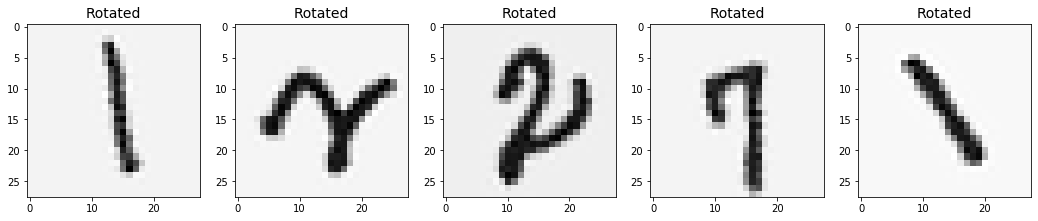

In [17]:
'Recreating some rotations'
image1 = X_test[0]
image2 = X_test[2]
image3 = X_test[3]
image4 = X_test[4]
image5 = X_test[5]

rotated_image_1 = rotate_image(image1, 35)
rotated_image_2 = rotate_image(image2, 50)
rotated_image_3 = rotate_image(image3, 35)
rotated_image_4 = rotate_image(image4, 35)
rotated_image_5 = rotate_image(image5, 45)

plt.figure(figsize=(18,6))
plt.subplot(151)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_4.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_5.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

After obeserving the augmented test set, it is clear that there is some degree of rotation in the original images (towards the left ie. positive angle rotation).

We listed a sequence of images from the augmented test set and compared it to the original images in the non-augmented test set. After this, we tried to recreate the rotation by tuning through trail and error to get the augmentation as close to the test dataset as possible.

## Augment the Training Data

In [18]:
%%time

X_train_augmented = [image for image in X_train_original ]
y_train_augmented = [label for label in y_train]

# Augmentation by rotating
for angle in (45,90,180,270): #35 ,70, 120, 150
    for image, label in zip(X_train_original, y_train):
        X_train_augmented.append(rotate_image(image, angle))
        y_train_augmented.append(label)
        
X_train_augmented = [image for image in X_train_augmented ]
y_train_augmented = [label for label in y_train_augmented]
        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print("X_train_augmented Shape: ", X_train_augmented.shape)

X_train_augmented Shape:  (280000, 784)
Wall time: 51 s


## Randomize the Augmented Data

In [19]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

## Scale the Augmented Training Data

In [20]:
X_train_augmented /= 255.0

## Train MLP Model using Augmened Training Data

In [21]:
%%time
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=200, alpha=0.01,
                    solver='adam', verbose=True, tol=1e-5, random_state=1, 
                    learning_rate='constant', learning_rate_init=0.001, activation='relu',
                    early_stopping=True, n_iter_no_change=10)


# Train the model using the augmented training data
mlp_clf.fit(X_train_augmented, y_train_augmented)


Iteration 1, loss = 0.54551092
Validation score: 0.913607
Iteration 2, loss = 0.26666069
Validation score: 0.933750
Iteration 3, loss = 0.21615740
Validation score: 0.939357
Iteration 4, loss = 0.19034740
Validation score: 0.947286
Iteration 5, loss = 0.17475470
Validation score: 0.949536
Iteration 6, loss = 0.16349685
Validation score: 0.950071
Iteration 7, loss = 0.15506888
Validation score: 0.950786
Iteration 8, loss = 0.14799424
Validation score: 0.953714
Iteration 9, loss = 0.14240915
Validation score: 0.952286
Iteration 10, loss = 0.13848040
Validation score: 0.952179
Iteration 11, loss = 0.13509295
Validation score: 0.955786
Iteration 12, loss = 0.13218546
Validation score: 0.954536
Iteration 13, loss = 0.12838440
Validation score: 0.954286
Iteration 14, loss = 0.12592993
Validation score: 0.956893
Iteration 15, loss = 0.12451704
Validation score: 0.955179
Iteration 16, loss = 0.12229556
Validation score: 0.955643
Iteration 17, loss = 0.12084768
Validation score: 0.955143
Iterat

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)

## Evaluate the Model using Test Data (Non-Augmented & Augmented)
Show the training accuracy, test (non-augmented) accuracy and test (augmented) accuracy. 

In [22]:
y_train_predicted = mlp_clf.predict(X_train_augmented)
accuracy_score_train_mlp = np.mean(y_train_predicted == y_train_augmented)
print("\nTraining Accuracy (based on augmented model): ", accuracy_score_train_mlp)


y_test_predicted = mlp_clf.predict(X_test)
accuracy_score_test_mlp = np.mean(y_test_predicted == y_test)
print("\nNon-Augmented Test Accuracy (based on augmented model): ", accuracy_score_test_mlp)


y_test_aug_predicted = mlp_clf.predict(X_test_augmented)
accuracy_score_test_aug_mlp = np.mean(y_test_aug_predicted == y_test_augmented)
print("\nAugmented Test Accuracy (based on augmented model):  ", accuracy_score_test_aug_mlp)


Training Accuracy (based on augmented model):  0.9827607142857143

Non-Augmented Test Accuracy (based on augmented model):  0.9584285714285714

Augmented Test Accuracy (based on augmented model):   0.8720142857142857
